In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
ipl_match=pd.read_csv(R"/home/gokul/Downloads/matches.csv")
ipl_match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
#team vice toss decision
t_vice_bf=ipl_match.pivot_table(index='toss_winner',values='id',columns=['toss_decision']\
                       ,aggfunc=len)[:5]
t_vice_bf

toss_decision,bat,field
toss_winner,,
Chennai Super Kings,44.0,22.0
Deccan Chargers,24.0,19.0
Delhi Daredevils,26.0,46.0
Gujarat Lions,1.0,14.0
Kings XI Punjab,25.0,43.0


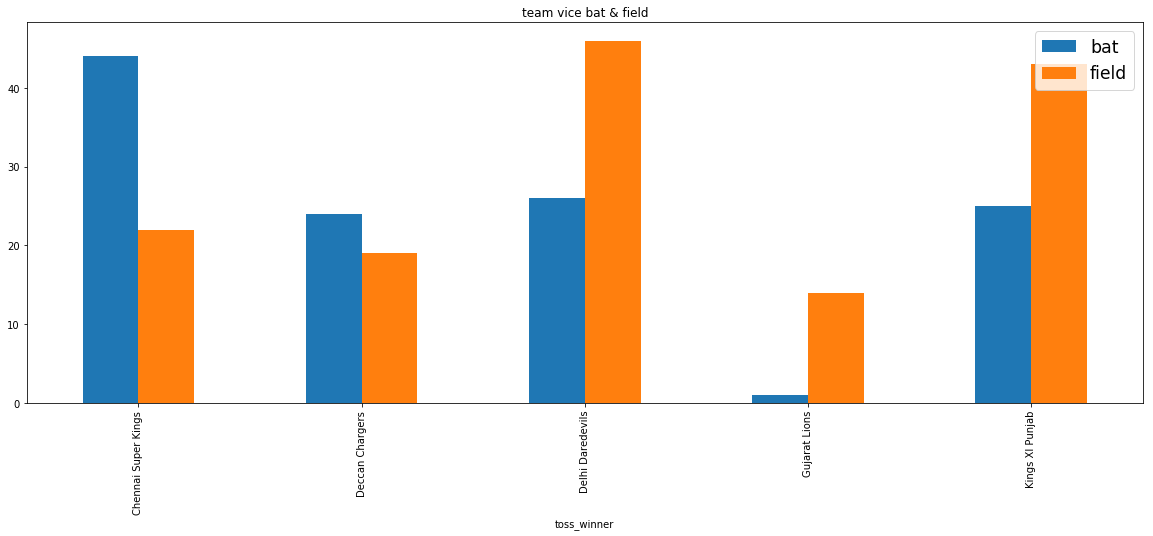

In [6]:
#colors = ['gold', 'lightskyblue']
t_vice_bf.plot(kind ='bar',figsize=(20,7))
plt.title("team vice bat & field")
plt.legend(fontsize ='xx-large')

In [7]:
#overal toss decision
temp_series=ipl_match.toss_decision.value_counts(normalize = True)
temp_series

field    0.570755
bat      0.429245
Name: toss_decision, dtype: float64

In [8]:
np.array(temp_series.index)

array(['field', 'bat'], dtype=object)

In [9]:
np.array(temp_series)

array([0.57075472, 0.42924528])

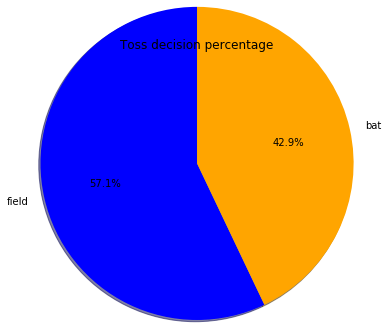

In [10]:
#overall toss_decision

#print temp_series
labels = (np.array(temp_series.index))
sizes = (np.array(temp_series))
#print sizes
#colors = ['gold', 'lightskyblue']
plt.axis("equal")
plt.pie(sizes, labels=labels, colors=['blue','orange'],
    autopct='%1.1f%%', shadow=True, startangle=90,radius =1.8)
plt.title("Toss decision percentage")
plt.show()

In [11]:
#venue wise toss decision
v_d=ipl_match.pivot_table(index='venue',values='id',columns=['toss_decision'],aggfunc=len).iloc[[0,1,2,3,5,6,7],:]
v_d

toss_decision,bat,field
venue,,
Barabati Stadium,2.0,5.0
Brabourne Stadium,6.0,5.0
Buffalo Park,3.0,NaN
De Beers Diamond Oval,2.0,1.0
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,5.0,6.0
Dubai International Cricket Stadium,3.0,4.0
Eden Gardens,28.0,33.0


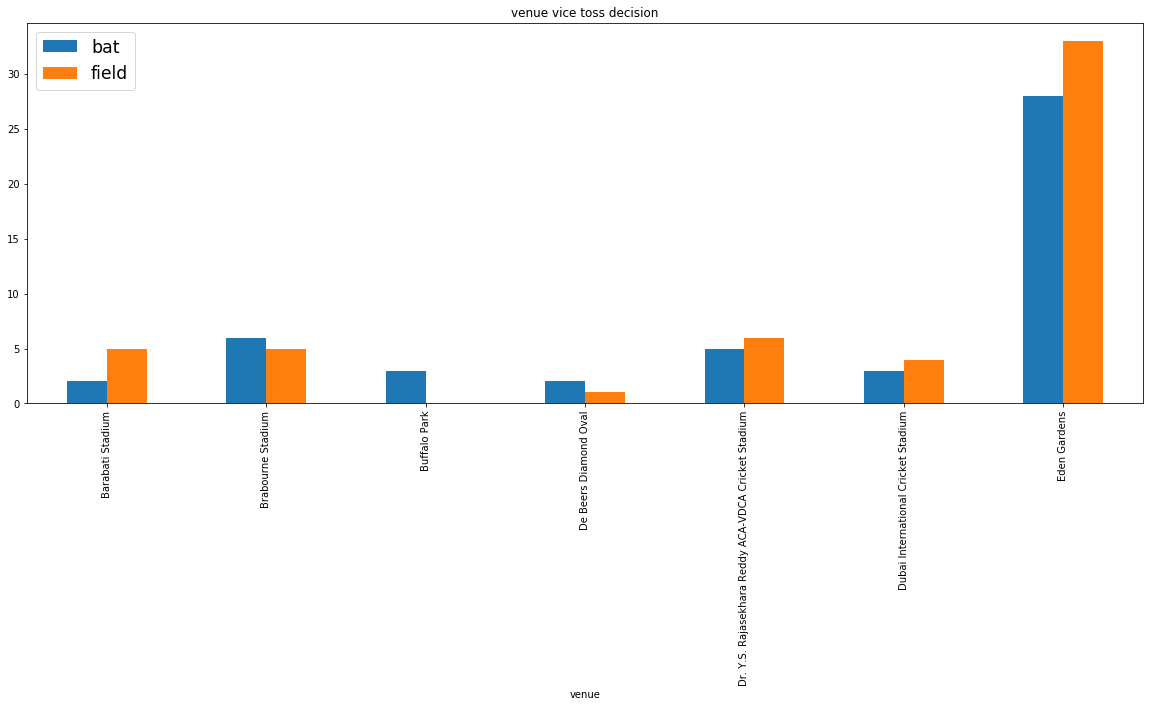

In [12]:
v_d.plot(kind ='bar',figsize=(20,7))
plt.title("venue vice toss decision")
plt.legend(fontsize ='xx-large')

In [13]:
#player of the match
top_batsman=ipl_match['player_of_match'].value_counts(ascending=False)[:10]
top_batsman

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
RG Sharma         14
SK Raina          14
MS Dhoni          13
G Gambhir         13
MEK Hussey        12
AM Rahane         12
Name: player_of_match, dtype: int64

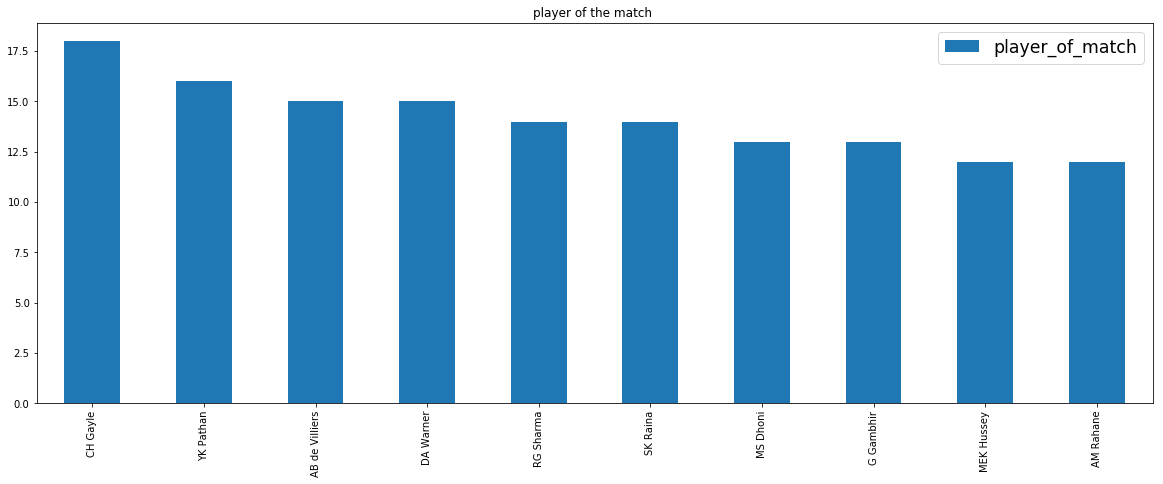

In [14]:
top_batsman.plot(kind ='bar',figsize=(20,7))
plt.title("player of the match ")
plt.legend(fontsize ='xx-large')

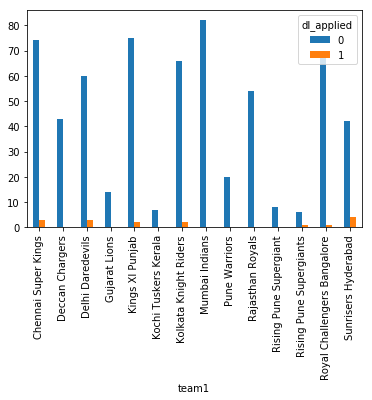

In [15]:
#without dl
dl=pd.crosstab(ipl_match['team1'],ipl_match['dl_applied']).plot(kind='bar')

In [20]:
ipl_deliveries=pd.read_csv(R"/home/gokul/Downloads/deliveries.csv")
ipl_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Text(0, 0.5, 'Runs')

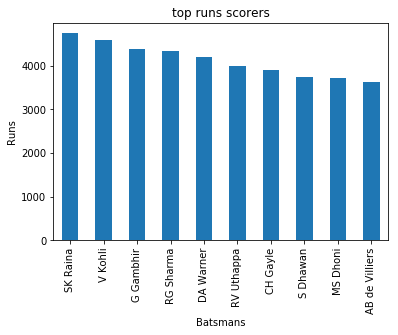

In [19]:
# top 10 run scorers
t10=ipl_deliveries.groupby(['batsman'])['total_runs'].sum()
t10.sort_values(ascending=False)[:10].plot("bar")
plt.xlabel('Batsmans')
plt.title('top runs scorers')
plt.ylabel("Runs")


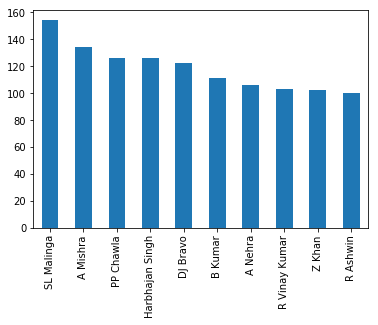

In [18]:
#top 10 wicket takers
w_t=ipl_deliveries.loc[(ipl_deliveries["dismissal_kind"] == "caught") | (ipl_deliveries["dismissal_kind"] == "bowled")|(ipl_deliveries["dismissal_kind"] == "lbw")|(ipl_deliveries["dismissal_kind"]=='stumped')|(ipl_deliveries["dismissal_kind"]=='caught and bowled')]
w_t.bowler.value_counts(ascending=False)[:10].plot('bar')